# Лабораторная работа № 1. Вариант 6
Автор: Леонов Владислав  
Группа: М23-524

## Weighted least squares




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.08e-15
Time:                        07:32:29   Log-Likelihood:                -99.062
No. Observations:                  56   AIC:                             202.1
Df Residuals:                      54   BIC:                             206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1037      0.404     -0.257      0.7

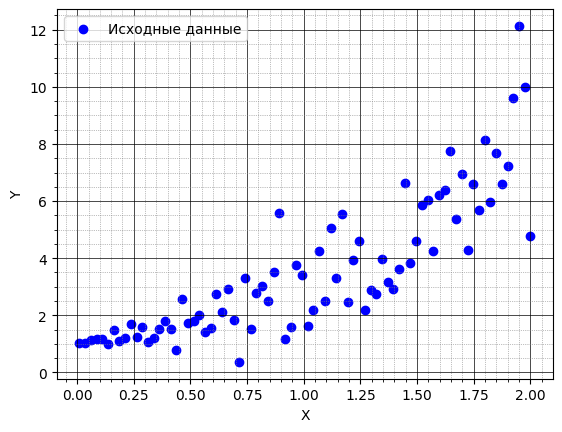

In [411]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import chi2

%matplotlib inline
data = pd.read_csv("data/data_v1-06.csv")
X = data['x'].values.reshape(-1, 1)
Y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=55)

pairs = list(zip(X_train, Y_train))
sorted_pairs = sorted(pairs, key=lambda pair: pair[0])
X_train, Y_train = zip(*sorted_pairs)
X_train = np.concatenate(X_train)

pairs = list(zip(X_test, Y_test))
sorted_pairs = sorted(pairs, key=lambda pair: pair[0])
X_test, Y_test = zip(*sorted_pairs)
X_test = np.concatenate(X_test)

X_train_b = sm.add_constant(X_train)
X_test_b = sm.add_constant(X_test)

model_ols = sm.OLS(Y_train, X_train_b).fit()
print(model_ols.summary())

plt.scatter(X_test, Y_test, color = 'blue', label='Исходные данные')
plt.scatter(X_train, Y_train, color = 'blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [437]:
r2_train_ols = model_ols.rsquared
r2_test_ols = 1 - (1 - r2_train_ols) * (len(Y_test) - 1) / (len(Y_test) - X_test_b.shape[1] - 1)

print(f'Коэффициент детерминации на обучающей выборке (OLS):{r2_train_ols:.4f}')
print(f'Коэффициент детерминации на тестовой выборке (OLS):{r2_test_ols:.4f}')

2
Коэффициент детерминации на обучающей выборке (OLS):0.6989
Коэффициент детерминации на тестовой выборке (OLS):0.6702


In [413]:
prediction_interval_90_ols = model_ols.get_prediction(X_test_b).conf_int(alpha = 0.1)
prediction_interval_99_ols = model_ols.get_prediction(X_test_b).conf_int(alpha = 0.01)

print(f'Доверительные интервалы для функции регрессии (90% доверительная вероятность):\n {prediction_interval_90_ols}')
print(f'Доверительные интервалы для функции регрессии (99% доверительная вероятность):\n {prediction_interval_99_ols}')

Доверительные интервалы для функции регрессии (90% доверительная вероятность):
 [[-0.52555574  0.76817578]
 [-0.31365784  0.93176372]
 [-0.20783435  1.01368315]
 [-0.10210118  1.0956929 ]
 [ 0.21449961  1.34232088]
 [ 0.42500347  1.50730286]
 [ 0.84438136  1.83889666]
 [ 1.05310515  2.00565871]
 [ 1.36472813  2.25726451]
 [ 1.67426159  2.51095981]
 [ 1.87923952  2.68146773]
 [ 2.38573723  3.11368463]
 [ 2.97920891  3.64667048]
 [ 3.36410034  4.01275074]
 [ 3.55304728  4.1994387 ]
 [ 3.73955947  4.38856142]
 [ 4.0144796   4.67634834]
 [ 4.81148258  5.56895713]
 [ 5.06964238  5.8742497 ]
 [ 5.15503599  5.97667354]
 [ 5.32495049  6.18239394]
 [ 5.49381863  6.38916071]
 [ 5.66143522  6.59643372]
 [ 5.91187906  6.90944224]]
Доверительные интервалы для функции регрессии (99% доверительная вероятность):
 [[-0.91069163  1.15331166]
 [-0.68441216  1.30251803]
 [-0.57147257  1.37732137]
 [-0.45867708  1.4522688 ]
 [-0.12124583  1.67806632]
 [ 0.10280962  1.82949671]
 [ 0.54832029  2.13495773]
 [

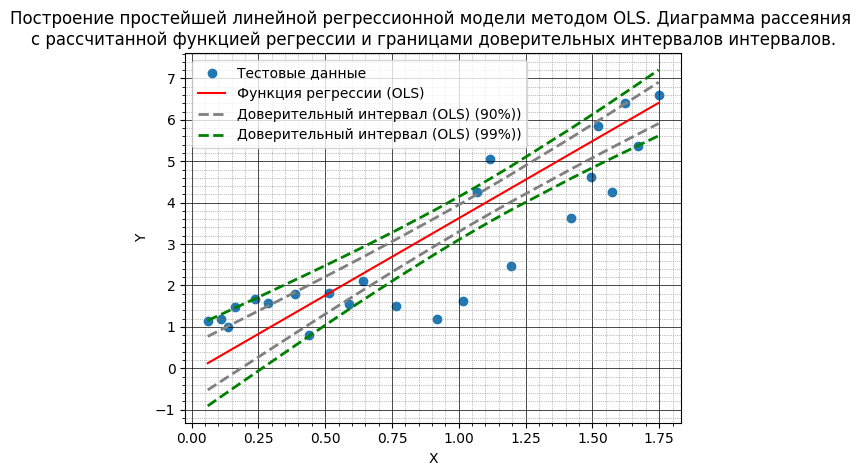

In [414]:
plt.scatter(X_test, Y_test, label="Тестовые данные")
plt.plot(
    X_test, model_ols.predict(X_test_b), color="red", label=f"Функция регрессии (OLS)"
)

plt.plot(
    X_test,
    prediction_interval_90_ols[:, 0],
    "--",
    color="gray",
    linewidth="2",
    label=f"Доверительный интервал (OLS) (90%))",
)

plt.plot(X_test, prediction_interval_90_ols[:, 1], "--", color="gray", linewidth="2")

plt.plot(
    X_test,
    prediction_interval_99_ols[:, 0],
    "--",
    color="green",
    linewidth="2",
    label=f"Доверительный интервал (OLS) (99%))",
)

plt.plot(X_test, prediction_interval_99_ols[:, 1], "--", color="green", linewidth="2")


plt.xlabel("X")

plt.ylabel("Y")

plt.legend()

plt.minorticks_on()

plt.grid(which="major", linestyle="-", linewidth="0.5", color="black")

plt.grid(which="minor", linestyle=":", linewidth="0.5", color="gray")
plt.title(
    "Построение простейшей линейной регрессионной модели методом OLS. Диаграмма рассеяния \nс рассчитанной функцией регрессии и границами доверительных интервалов интервалов."
)

plt.show()

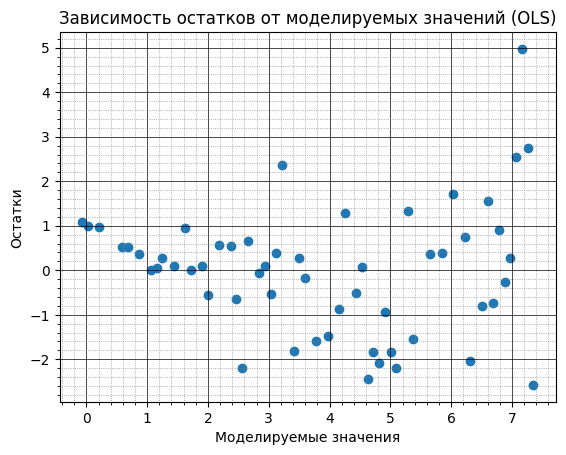

In [415]:
residuals_ols_train = model_ols.resid
residuals_ols_test = Y_test - model_ols.predict(X_test_b)
plt.scatter(model_ols.fittedvalues, residuals_ols_train)
plt.xlabel('Моделируемые значения')
plt.ylabel('Остатки')
plt.title('Зависимость остатков от моделируемых значений (OLS)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

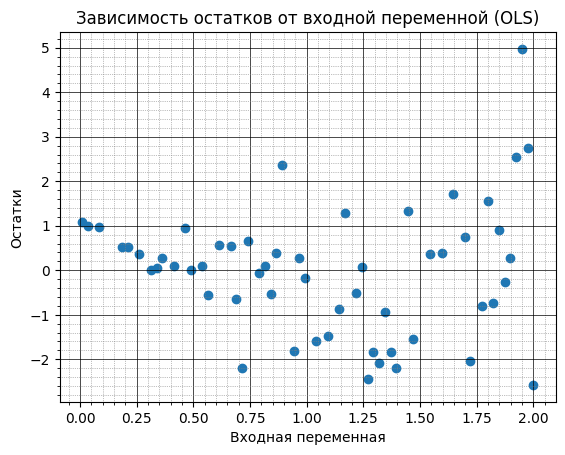

In [416]:
plt.scatter(X_train, residuals_ols_train)
plt.xlabel('Входная переменная')
plt.ylabel('Остатки')
plt.title('Зависимость остатков от входной переменной (OLS)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [417]:
# grouped_data = pd.DataFrame({'X': X_train, 'Residuals': residuals})
# grouped_variances = grouped_data.groupby('X')['Residuals'].var().reset_index()
# print(X_train)
# plt.scatter(grouped_variances.index, grouped_variances['Residuals'])
# plt.xlabel('Входная переменная (группы)')
# plt.ylabel('Дисперсия остатков')
# plt.title('Зависимость групповой дисперсии от номера группы')
# plt.show()

In [418]:
mod_residuals_model = sm.OLS(np.abs(residuals_ols_train), X_train_b).fit()
print(mod_residuals_model.summary())
t_statistic = mod_residuals_model.tvalues[1]
p_value = mod_residuals_model.pvalues[1]

# t-статистика - это мера того, насколько значимо коэффициент регрессии отличается от нуля. Чем больше t, тем более значима модель.
print(f"Т-статистика: {t_statistic:.4f}")
# если p-value мало, то можно сказать, что соответствующий коэффициент статистически значим.
print(f"P-значение: {p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     15.12
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           0.000279
Time:                        07:32:31   Log-Likelihood:                -69.300
No. Observations:                  56   AIC:                             142.6
Df Residuals:                      54   BIC:                             146.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2489      0.237      1.048      0.2

In [419]:
bp_test = het_breuschpagan(residuals_ols_train, X_train_b)
print("Breusch-Pagan тест на гетероскедастичность:")
print(f"LM статистика: {bp_test[0]:.4f}")
print(f"P-значение: {bp_test[1]:.4f}")
print(f"F-статистика: {bp_test[2]:.4f}")
print(f"P-значение для F-статистики: {bp_test[3]:.4f}")
# Если P-значение < 0.05, то можно считать, что гетероскедастичность присутствует в данных.

Breusch-Pagan тест на гетероскедастичность:
LM статистика: 9.2124
P-значение: 0.0024
F-статистика: 10.6325
P-значение для F-статистики: 0.0019


In [420]:
weights_a = 1 / mod_residuals_model.predict(X_train_b)
model_wls_a = sm.WLS(Y_train, X_train_b, weights=weights_a).fit()
print(model_wls_a.summary())

weights_b = 1 / X_train_b[:, 1]  
model_wls_b = sm.WLS(Y_train, X_train_b, weights=weights_b).fit()
print(model_wls_b.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            WLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           3.43e-17
Time:                        07:32:31   Log-Likelihood:                -91.055
No. Observations:                  56   AIC:                             186.1
Df Residuals:                      54   BIC:                             190.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3627      0.256      1.416      0.1

In [421]:
r2_train_wls_a = model_wls_a.rsquared
r2_test_wls_a = 1 - (1 - r2_train_wls_a) * (len(Y_test) - 1) / (len(Y_test) - X_test_b.shape[1] - 1)

print(f'Коэффициент детерминации на обучающей выборке (WLS - a):{r2_train_wls_a:.4f}')
print(f'Коэффициент детерминации на тестовой выборке (WLS - a):{r2_test_wls_a:.4f}')

Коэффициент детерминации на обучающей выборке (WLS - a):0.7348
Коэффициент детерминации на тестовой выборке (WLS - a):0.7095


In [422]:
r2_train_wls_b = model_wls_b.rsquared
r2_test_wls_b = 1 - (1 - r2_train_wls_b) * (len(Y_test) - 1) / (len(Y_test) - X_test_b.shape[1] - 1)

print(f'Коэффициент детерминации на обучающей выборке (WLS - b):{r2_train_wls_b:.4f}')
print(f'Коэффициент детерминации на тестовой выборке (WLS - b):{r2_test_wls_b:.4f}')

Коэффициент детерминации на обучающей выборке (WLS - b):0.7905
Коэффициент детерминации на тестовой выборке (WLS - b):0.7705


In [423]:
prediction_interval_90_wls_a = model_wls_a.get_prediction(X_test_b).conf_int(alpha = 0.1)
prediction_interval_99_wls_a = model_wls_a.get_prediction(X_test_b).conf_int(alpha = 0.01)

print(f'Доверительные интервалы для функции регрессии (WLS - a) (90% доверительная вероятность):\n {prediction_interval_90_wls_a}')
print(f'Доверительные интервалы для функции регрессии (WLS - a) (99% доверительная вероятность):\n {prediction_interval_99_wls_a}')

Доверительные интервалы для функции регрессии (WLS - a) (90% доверительная вероятность):
 [[0.15383322 0.96880833]
 [0.33668378 1.11736368]
 [0.42789298 1.19185743]
 [0.5189452  1.26650817]
 [0.79105067 1.49151156]
 [0.97145603 1.6425121 ]
 [1.32936099 1.94741895]
 [1.50660165 2.1015842 ]
 [1.76992475 2.33536996]
 [2.02976778 2.57263579]
 [2.20083863 2.73297084]
 [2.62024792 3.14207632]
 [3.10753029 3.64901166]
 [3.42345295 3.99590082]
 [3.57916753 4.17172371]
 [3.73353556 4.34889314]
 [3.96257355 4.61650354]
 [4.63826355 5.43207434]
 [4.86068367 5.70696042]
 [4.93458224 5.79883058]
 [5.08206039 5.98288991]
 [5.22915479 6.16733298]
 [5.37561861 6.35174881]
 [5.59519667 6.62947695]]
Доверительные интервалы для функции регрессии (WLS - a) (99% доверительная вероятность):
 [[-0.08877984  1.21142139]
 [ 0.10428019  1.34976727]
 [ 0.20046548  1.41928493]
 [ 0.29640032  1.48905305]
 [ 0.58252779  1.70003444]
 [ 0.77168678  1.84228135]
 [ 1.14536895  2.13141099]
 [ 1.32947901  2.27870684]
 [ 

In [424]:
prediction_interval_90_wls_b = model_wls_b.get_prediction(X_test_b).conf_int(alpha = 0.1)
prediction_interval_99_wls_b = model_wls_b.get_prediction(X_test_b).conf_int(alpha = 0.01)

print(f'Доверительные интервалы для функции регрессии (WLS - b) (90% доверительная вероятность):\n {prediction_interval_90_wls_b}')
print(f'Доверительные интервалы для функции регрессии (WLS - b) (99% доверительная вероятность):\n {prediction_interval_99_wls_b}')

Доверительные интервалы для функции регрессии (WLS - b) (90% доверительная вероятность):
 [[0.85552167 1.19180763]
 [1.00418898 1.32822898]
 [1.07795318 1.39700911]
 [1.15131277 1.46619384]
 [1.36881511 1.67632448]
 [1.51157551 1.81865274]
 [1.79171876 2.10868679]
 [1.92926421 2.25623   ]
 [2.13281582 2.48031137]
 [2.3335464  2.70721376]
 [2.46607219 2.85977663]
 [2.79388624 3.24468421]
 [3.18257365 3.71126275]
 [3.43979679 4.02421692]
 [3.56804209 4.18117345]
 [3.69605859 4.33835878]
 [3.88746499 4.57418925]
 [4.46023342 5.28426316]
 [4.65075894 5.52154039]
 [4.71422607 5.60067418]
 [4.84110461 5.75899746]
 [4.96791503 5.91738887]
 [5.09441247 6.07552738]
 [5.28443297 6.31330963]]
Доверительные интервалы для функции регрессии (WLS - b) (99% доверительная вероятность):
 [[0.75541142 1.29191789]
 [0.90772428 1.42469368]
 [0.98297219 1.49199009]
 [1.05757462 1.55993199]
 [1.27727146 1.76786813]
 [1.42016051 1.91006773]
 [1.69735934 2.20304622]
 [1.83192851 2.3535657 ]
 [2.02936854 2.5837

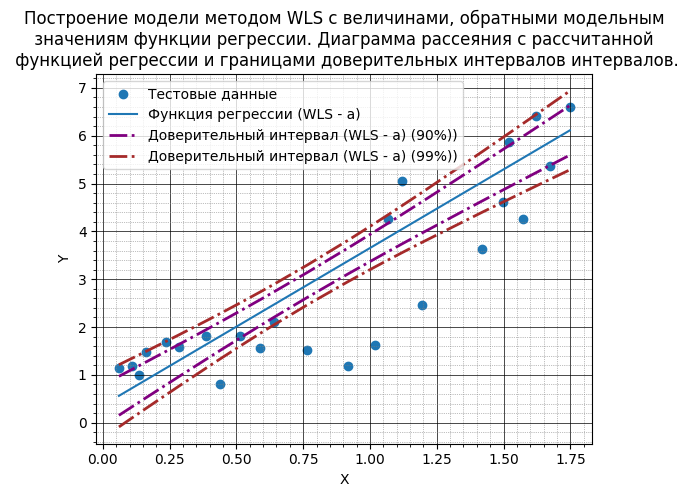

In [425]:
plt.scatter(X_test, Y_test, label='Тестовые данные')
plt.plot(X_test, model_wls_a.predict(X_test_b), label=f'Функция регрессии (WLS - a)')

plt.plot(X_test, prediction_interval_90_wls_a[:, 0], '-.', color='purple', linewidth='2', label=f'Доверительный интервал (WLS - a) (90%))')
plt.plot(X_test, prediction_interval_90_wls_a[:, 1], '-.', color='purple', linewidth='2')

plt.plot(X_test, prediction_interval_99_wls_a[:, 0], '-.', color='brown', linewidth='2', label=f'Доверительный интервал (WLS - a) (99%))')
plt.plot(X_test, prediction_interval_99_wls_a[:, 1], '-.', color='brown', linewidth='2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.title(
    "Построение модели методом WLS c величинами, обратными модельным\n значениям функции регрессии. Диаграмма рассеяния с рассчитанной \n функцией регрессии и границами доверительных интервалов интервалов."
)
plt.show()

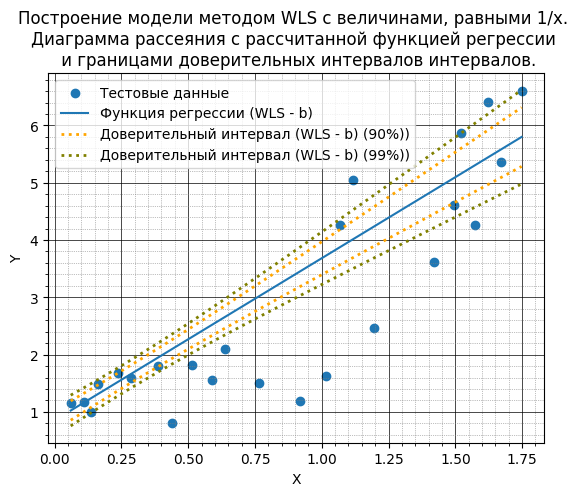

In [426]:
plt.scatter(X_test, Y_test, label='Тестовые данные')
plt.plot(X_test, model_wls_b.predict(X_test_b), label=f'Функция регрессии (WLS - b)')

plt.plot(X_test, prediction_interval_90_wls_b[:, 0], ':', color='orange', linewidth='2', label=f'Доверительный интервал (WLS - b) (90%))')
plt.plot(X_test, prediction_interval_90_wls_b[:, 1], ':', color='orange', linewidth='2')

plt.plot(X_test, prediction_interval_99_wls_b[:, 0], ':', color='olive', linewidth='2', label=f'Доверительный интервал (WLS - b) (99%))')
plt.plot(X_test, prediction_interval_99_wls_b[:, 1], ':', color='olive', linewidth='2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.title(
    "Построение модели методом WLS c величинами, равными 1/x. \nДиаграмма рассеяния с рассчитанной функцией регрессии \n и границами доверительных интервалов интервалов."
)
plt.show()

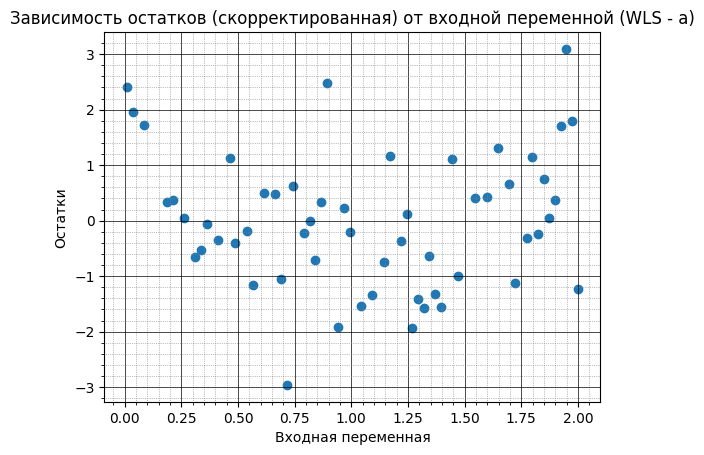

In [427]:
residuals_wls_a_train = model_wls_a.resid * weights_a
residuals_wls_a_test = Y_test - model_wls_a.predict(X_test_b)
plt.scatter(X_train, residuals_wls_a_train)
plt.xlabel('Входная переменная')
plt.ylabel('Остатки')
plt.title('Зависимость остатков (скорректированная) от входной переменной (WLS - a)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

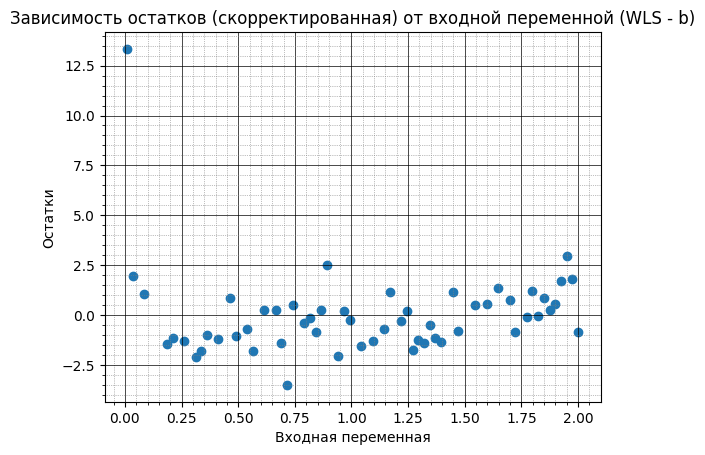

In [428]:

residuals_wls_b_train = model_wls_b.resid * weights_b
residuals_wls_b_test = (Y_test - model_wls_b.predict(X_test_b))
plt.scatter(X_train, residuals_wls_b_train)
plt.xlabel('Входная переменная')
plt.ylabel('Остатки')
plt.title('Зависимость остатков (скорректированная) от входной переменной (WLS - b)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [429]:
def hist_residuals(residuals_train, residuals_test, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_train, bins=(len(residuals_train) // 4), color='blue', edgecolor = 'black', alpha=0.7, label='Обучающая выборка')
    plt.title(f'Гистограмма остатков {title} (обучающая выборка)')
    plt.xlabel('Величина остатка')
    plt.ylabel('Количество остатков')
    plt.legend()
    plt.minorticks_on()

    plt.subplot(1, 2, 2)
    plt.hist(residuals_test, bins=(len(residuals_test) // 4), color='red', edgecolor = 'black', alpha=0.7, label='Тестовая выборка')
    plt.title(f'Гистограмма остатков {title} (тестовая выборка)')
    plt.xlabel('Величина остатка')
    plt.ylabel('Количество остатков')
    plt.legend()
    plt.minorticks_on()
    plt.show()

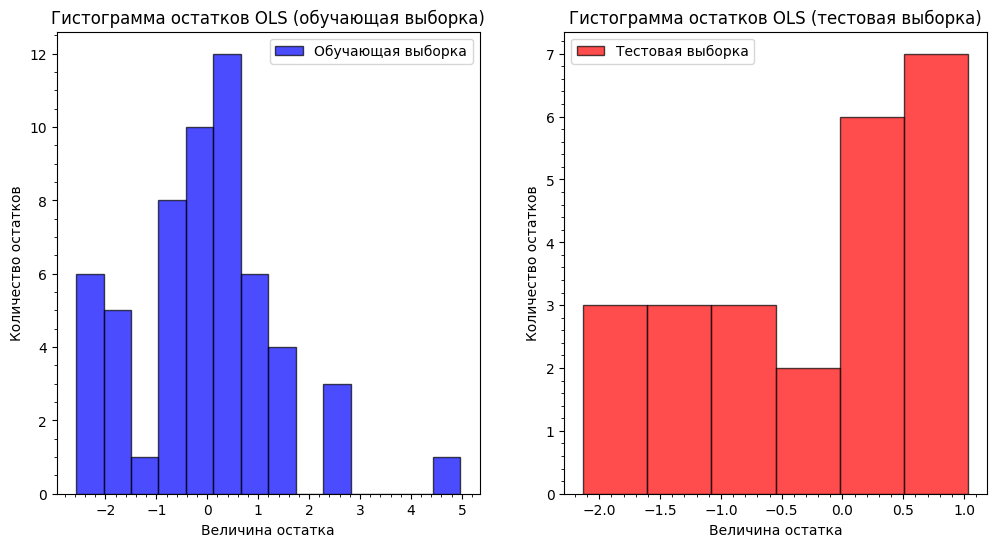

In [430]:
hist_residuals(residuals_ols_train, residuals_ols_test, 'OLS')

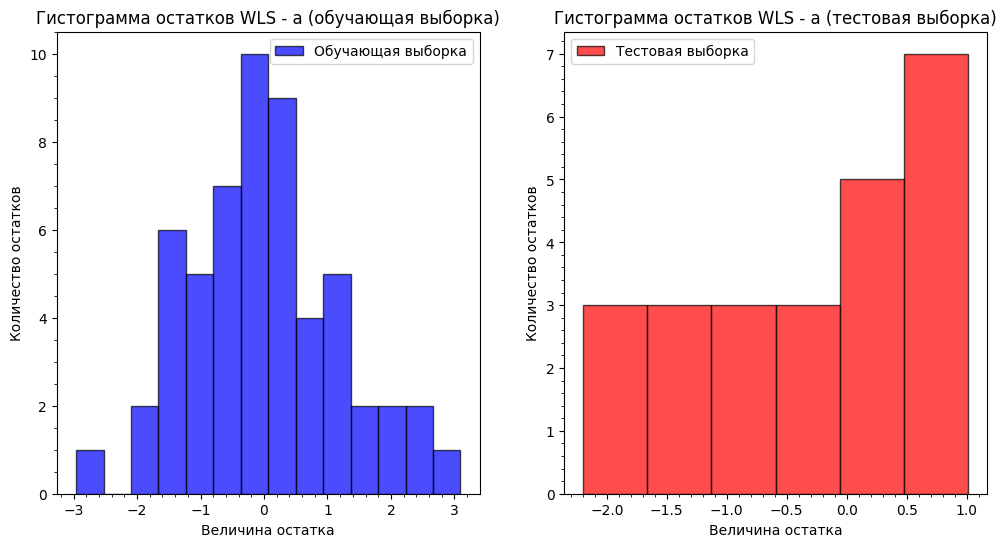

In [431]:
hist_residuals(residuals_wls_a_train, residuals_wls_a_test, 'WLS - a')

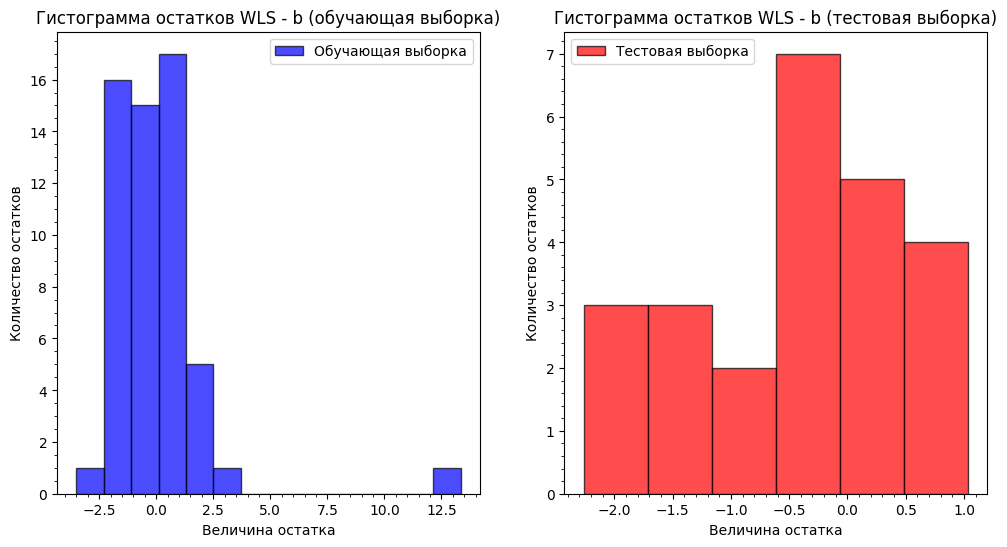

In [432]:
hist_residuals(residuals_wls_b_train, residuals_wls_b_test, 'WLS - b')


In [433]:
def make_normal_test(residuals_train, residuals_test, title):

    def _chi2_test(residuals):
        n = len(residuals)
        chi2_stat = np.sum(residuals**2)/np.var(residuals)
        p_value = 1 - chi2.cdf(chi2_stat, df = n - 1)
        return chi2_stat, p_value
    
    stat_train, p_value_train = _chi2_test(residuals_train)
    stat_test, p_value_test = _chi2_test(residuals_test)

# Если p-value < 0.05, то распределение не является нормальным
    print(f"Тест на нормальность остатков {title} (обучающая выборка):")
    print(f"Статистика критерия: {stat_train:.4f}")
    print(f"P-значение: {p_value_train:.4f}")
    print(f"Тест на нормальность остатков {title} (тестовая выборка):")
    print(f"Статистика критерия: {stat_test:.4f}")
    print(f"P-значение: {p_value_test:.4f}")


In [434]:
make_normal_test(residuals_ols_train, residuals_ols_test, 'OLS')

Тест на нормальность остатков OLS (обучающая выборка):
Статистика критерия: 56.0000
P-значение: 0.4371
Тест на нормальность остатков OLS (тестовая выборка):
Статистика критерия: 25.2445
P-значение: 0.3378


In [435]:
make_normal_test(residuals_wls_a_train, residuals_wls_a_test, 'WLS - a')

Тест на нормальность остатков WLS - a (обучающая выборка):
Статистика критерия: 56.0000
P-значение: 0.4371
Тест на нормальность остатков WLS - a (тестовая выборка):
Статистика критерия: 26.8178
P-значение: 0.2638


In [436]:
make_normal_test(residuals_wls_b_train, residuals_wls_b_test, 'WLS - b')

Тест на нормальность остатков WLS - b (обучающая выборка):
Статистика критерия: 56.0000
P-значение: 0.4371
Тест на нормальность остатков WLS - b (тестовая выборка):
Статистика критерия: 28.9454
P-значение: 0.1821
